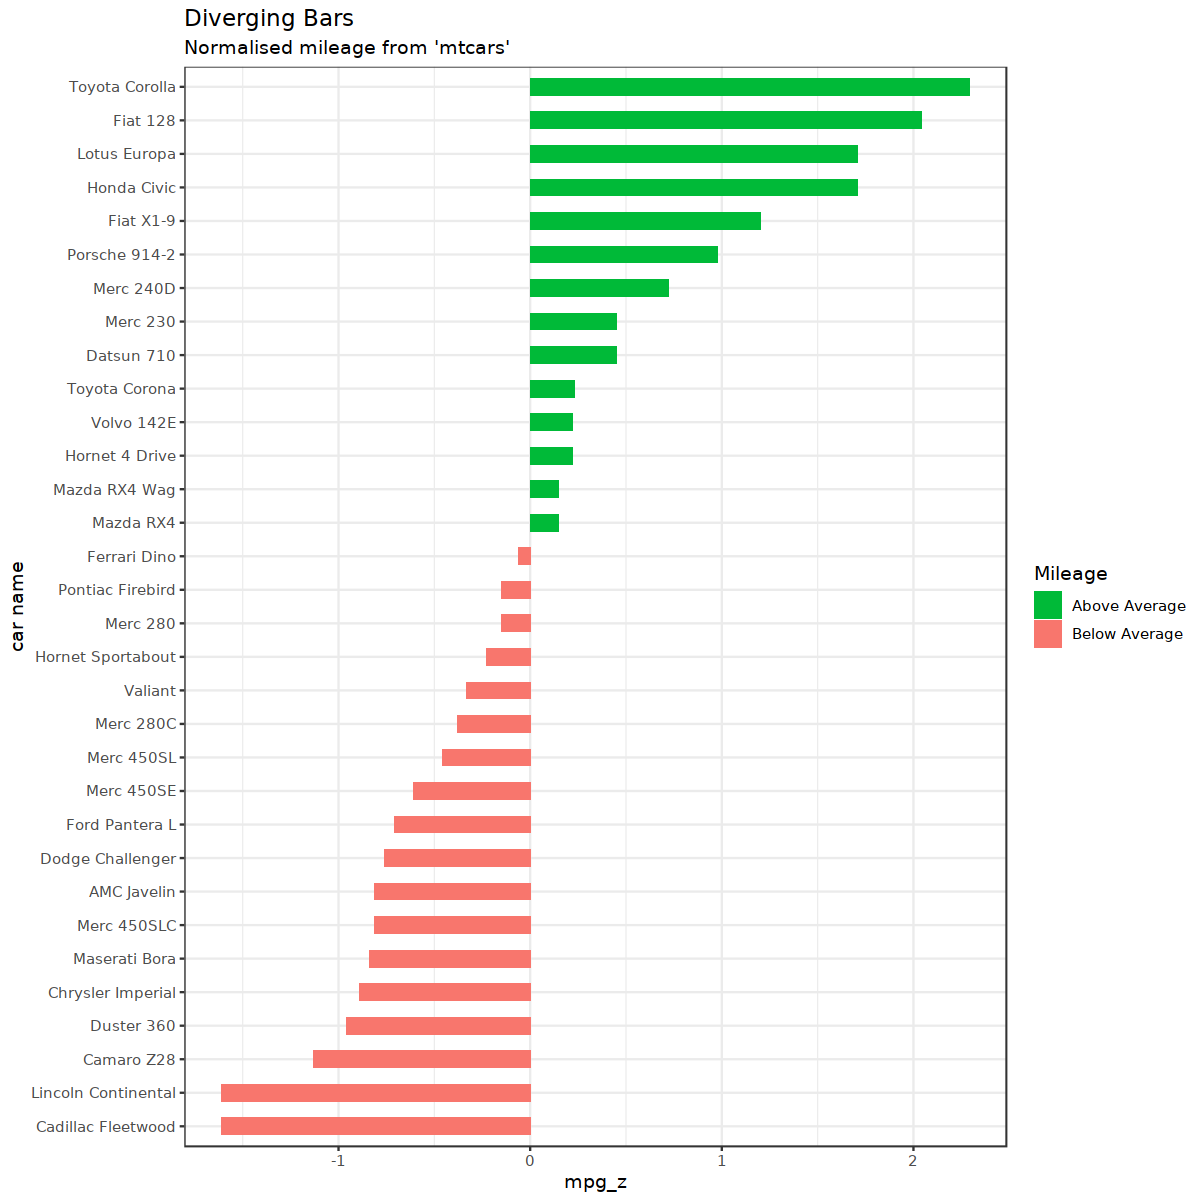

In [5]:
theme_set(theme_bw())  
options(repr.plot.width = 10, repr.plot.height = 10)
# Data Prep
data("mtcars")  # load data
mtcars$`car name` <- rownames(mtcars)  # create new column for car names
mtcars$mpg_z <- round((mtcars$mpg - mean(mtcars$mpg))/sd(mtcars$mpg), 2)  # compute normalized mpg
mtcars$mpg_type <- ifelse(mtcars$mpg_z < 0, "below", "above")  # above / below avg flag
mtcars <- mtcars[order(mtcars$mpg_z), ]  # sort
mtcars$`car name` <- factor(mtcars$`car name`, levels = mtcars$`car name`)  # convert to factor to retain sorted order in plot.

# Diverging Barcharts
ggplot(mtcars, aes(x=`car name`, y=mpg_z, label=mpg_z)) + 
  geom_bar(stat='identity', aes(fill=mpg_type), width=.5)  +
  scale_fill_manual(name="Mileage", 
                    labels = c("Above Average", "Below Average"), 
                    values = c("above"="#00ba38", "below"="#f8766d")) + 
  labs(subtitle="Normalised mileage from 'mtcars'", 
       title= "Diverging Bars") + 
  coord_flip()